# Part 1:  Formulate your question
The dataset that I am using for this analysis is a simple dataset that I gathered myself. The dataset holds the output production of solar photvaultaic (PV) energy systems in 15 minute time stamps. There are around 15 different systems, and each vary in the length of time for which they have data. The main question that I would like to address in this analysis is how the production data is distributed, and more particularly, how the variance of the systems compare against each other. The general question that I am trying to answer is how consistent is the energy production of solar PV power systems?

# Part 2: Read in your Data
*Is it properly formatted? Perform cleanup activities*

This is fairly complex because the data does not all come in one csv file. Given the nature of the source for the data, when I gathered it I put several csv files(in monthly periods) for each system in their own folder. The data exists in the "school_data" folder, which means I need to loop through each folder in the directory, read each csv file into a data frame, and then concatenate all of the csv files into one data frame for each system. The name of the folder is a random id associated with that system, so I'm storing the data frames for each system in a dictionary that maps the id to the data frame

In [1]:
import pandas as pd
import os

# when I do this on google colab, I'll need to load the data source from somewhere
# for now, I simply have the school_data directory

data_frames = {}

for _, dirs, __ in os.walk('school_data'):
    for d in dirs:
        for _, ___, files in os.walk(f'school_data/{d}'):
            df_list = []
            for file in files:
                df = pd.read_csv(f'school_data/{d}/{file}')
                df_list.append(df)
            system_df = pd.concat(df_list)
            data_frames[d] = system_df

Here I'm printing the names of the data frames just to make sure that they match the folder names

In [2]:
for df in data_frames:
    print(df)

505347
256177
787197
349060
103941
238320
569932
717193
641826
627759
1232644
466851
477834
896164


# Part 3: Check the packaging
*Make sure there are the right number of rows & columns, formats, etc.*

Look at the shape of each data frame. The number of rows is going to vary quite a bit, but there should only be two columns. One is the timestamp, and the other is the production value. 

In [3]:
for key, df in data_frames.items():
    print(df.shape)

(81312, 2)
(129216, 2)
(52608, 2)
(107520, 2)
(173568, 2)
(53952, 2)
(78816, 2)
(61536, 2)
(68352, 2)
(70560, 2)
(15456, 2)
(101952, 2)
(100704, 2)
(42432, 2)


# Part 4: Look at the top and bottom of data
*Confirm that all observations are there*

Running head on all data sets, but showing a large number of values. This is to verify that at the times of the day when there is actually sun that we are getting kWh values (at night time there is going to be no value for the production data). We can see that the names of the columns are 'date' for the timestamp, and 'value' for the data. Because I gathered the data myself, I know that unit of the value is Wh(Watt hour). 

In [4]:
for key, df in data_frames.items():
    print(f'System {key}')
#     df.head(50)
    print(df.head(50))

System 505347
                   date        value
0   2018-02-01 00:00:00          NaN
1   2018-02-01 00:15:00          NaN
2   2018-02-01 00:30:00          NaN
3   2018-02-01 00:45:00          NaN
4   2018-02-01 01:00:00          NaN
5   2018-02-01 01:15:00          NaN
6   2018-02-01 01:30:00          NaN
7   2018-02-01 01:45:00          NaN
8   2018-02-01 02:00:00          NaN
9   2018-02-01 02:15:00          NaN
10  2018-02-01 02:30:00          NaN
11  2018-02-01 02:45:00          NaN
12  2018-02-01 03:00:00          NaN
13  2018-02-01 03:15:00          NaN
14  2018-02-01 03:30:00          NaN
15  2018-02-01 03:45:00          NaN
16  2018-02-01 04:00:00          NaN
17  2018-02-01 04:15:00          NaN
18  2018-02-01 04:30:00          NaN
19  2018-02-01 04:45:00          NaN
20  2018-02-01 05:00:00          NaN
21  2018-02-01 05:15:00          NaN
22  2018-02-01 05:30:00          NaN
23  2018-02-01 05:45:00          NaN
24  2018-02-01 06:00:00      0.00000
25  2018-02-01 06:15:00 

# Part 5: Check the "n's"
*Identify “landmark” values and to check expectations (number of states, etc.)*

This is somewhat irrelevant for this dataset because it is so simple (there are only two columns, and the production data is a continuous number, so it's difficult the check the "n's"). What I am doing is some aggregation on each frame to get the number of months for which we have data, and just for fun, outputting the total sum of the production data in kWh(Kilowatt hour).

In [5]:
for key, df in data_frames.items():
    # need to set the index of each data frame to be the date and convert to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    grouper = df.groupby(pd.Grouper(freq='M'))
    print(f'System {key}')
    print(f'\t# of Months: {len(grouper.groups)}')
    production = df['value'].sum()
    print(f'\tTotal production: {production * 1/1000} kWh')

System 505347
	# of Months: 29
	Total production: 282016.8791711047 kWh
System 256177
	# of Months: 45
	Total production: 148038.71661221999 kWh
System 787197
	# of Months: 19
	Total production: 41891.385 kWh
System 349060
	# of Months: 38
	Total production: 49237.903 kWh
System 103941
	# of Months: 60
	Total production: 82464.9261676807 kWh
System 238320
	# of Months: 20
	Total production: 19768.760410873427 kWh
System 569932
	# of Months: 28
	Total production: 113669.861 kWh
System 717193
	# of Months: 22
	Total production: 176414.59 kWh
System 641826
	# of Months: 24
	Total production: 111488.898 kWh
System 627759
	# of Months: 25
	Total production: 91170.333 kWh
System 1232644
	# of Months: 6
	Total production: 5941.981 kWh
System 466851
	# of Months: 36
	Total production: 26236.14 kWh
System 477834
	# of Months: 35
	Total production: 5963.917 kWh
System 896164
	# of Months: 15
	Total production: 14148.444 kWh


# Part 6: Validate against an external data source
*Right order of magnitude, expected distribution, etc.*

A quick google search reveals that a home uses on avearge 37kWh in a day. From my background knowledge, I know that some of the systems are residential, and some are commercial. This means that for some of the systems, they should be producing roughly 37kWh a day if we make the assumption that they are producing energy to sustain a household. The commercial systems should produce numbers higher, but it's more difficult to get any estimate on what that number should be. That means we'll need to group the data by day, get the total power output, and then divide that by the number of days to get production per day (we'll need to change Wh to kWh). 

In [6]:
for key, df in data_frames.items():
    # need to set the index of each data frame to be the date and convert to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    grouper = df.groupby(pd.Grouper(freq='D'))
    print(f'System {key}')
    num_days = len(grouper.groups)
    print(f'\t# of Days: {num_days}')
    production = df['value'].sum()
    print(f'\tTotal production: {production} Wh')
    print(f'\tAverage production per day: { (production/num_days) * 0.001} kWh')

System 505347
	# of Days: 847
	Total production: 282016879.17110467 Wh
	Average production per day: 332.9597156683644 kWh
System 256177
	# of Days: 1346
	Total production: 148038716.61222 Wh
	Average production per day: 109.98418767624071 kWh
System 787197
	# of Days: 548
	Total production: 41891385.0 Wh
	Average production per day: 76.44413321167883 kWh
System 349060
	# of Days: 1120
	Total production: 49237903.0 Wh
	Average production per day: 43.962413392857144 kWh
System 103941
	# of Days: 1808
	Total production: 82464926.1676807 Wh
	Average production per day: 45.61113172991189 kWh
System 238320
	# of Days: 562
	Total production: 19768760.410873428 Wh
	Average production per day: 35.17573026845806 kWh
System 569932
	# of Days: 821
	Total production: 113669861.0 Wh
	Average production per day: 138.4529366626066 kWh
System 717193
	# of Days: 641
	Total production: 176414590.0 Wh
	Average production per day: 275.21776911076444 kWh
System 641826
	# of Days: 712
	Total production: 1114

Some of the systems are producing almost exactly 37 kWh a day, which fits the estimate for residential. There are systems which much higher daily averages, which would correspond with the commercial systems. One system only produces 5 kWh a day, which is an indication that it's either just a small system, or that there are some anomalies in the data. For the most part, I feel that the numbers validate the data. 

# Part 7: Make a Plot
*Checking and creating expectations about the shape of data and appropriate analyses*

One plot that I am interested in seeing is how the hour of the day corresponds to the production. This is another way to validate that the data is representative of an actual system. The middle of the day should produce the highest production values, while the production during the late evening and earlier morning should be 0. To do this, I'll first need to do an aggregation of the data by the hour of the day and then take the mean of the values. A simple scatter plot showing the hour of the day verses the production works for a plot

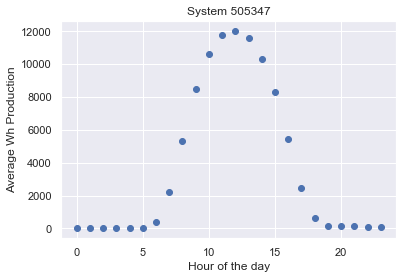

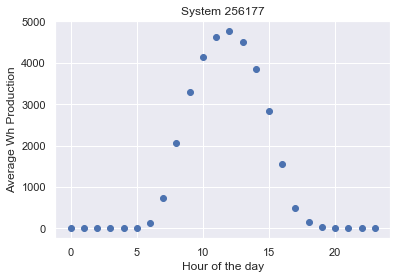

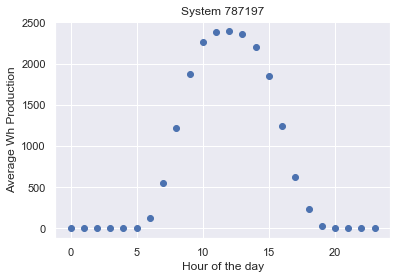

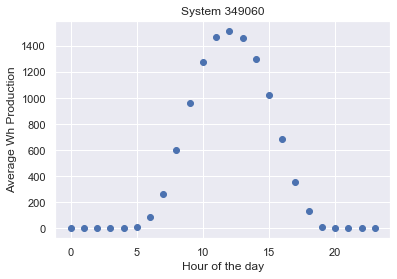

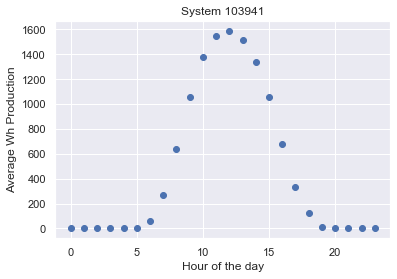

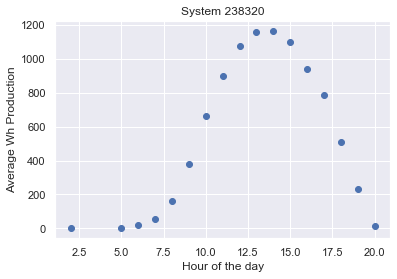

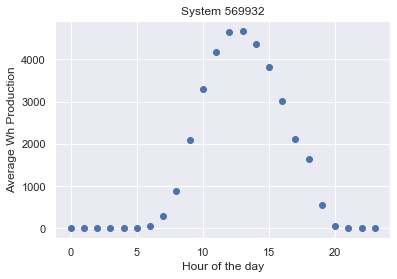

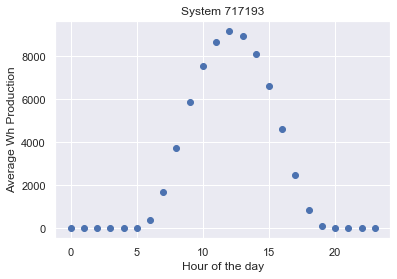

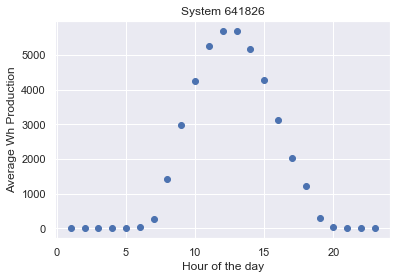

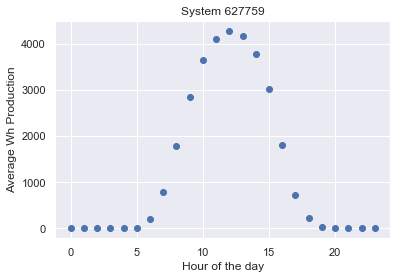

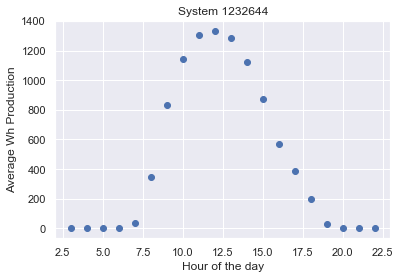

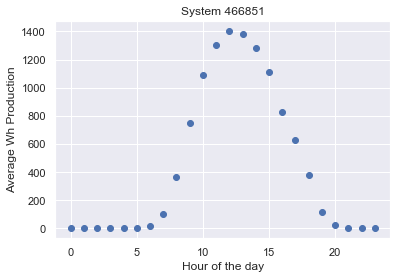

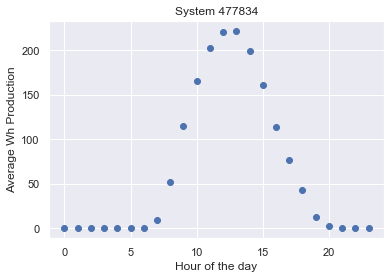

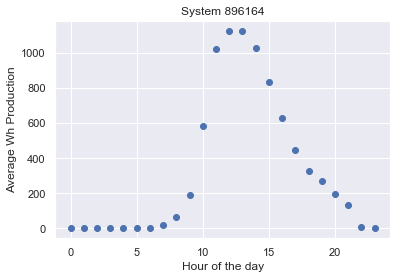

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


for key, df in data_frames.items():
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    grouper = df.groupby(df.index.hour)
    mean_df = grouper.mean()
    plt.scatter(mean_df.index, mean_df['value'])
    plt.xlabel("Hour of the day")
    plt.ylabel("Average Wh Production")
    plt.title(f'System {key}')
    plt.show()


As we expect, the peak production times for the systems are in be hours 10 to 15 for all systems. Some of the graphs have skewed the x-axis to not include the beginning hours of the day. I'm not sure why some of the plots do this and others don't. It's worth looking at the first hours of the day for each system to see what the difference between them is. 

Another graph that I'm interested in seeing is a histogram of the values to show what the distribution of the data is for each system. This will provide a visual representation of the answer to my question. Here I'm going to use seaborns distplot, which is a simple way to show the distribution. 

System 505347


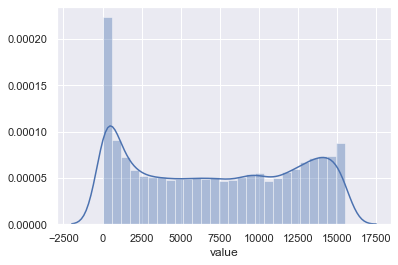

System 256177


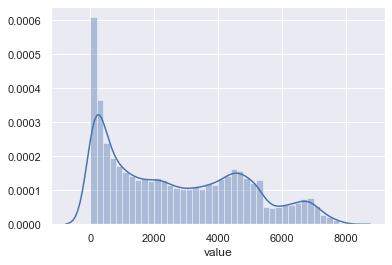

System 787197


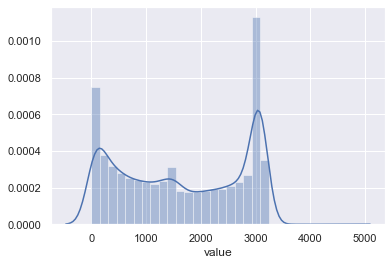

System 349060


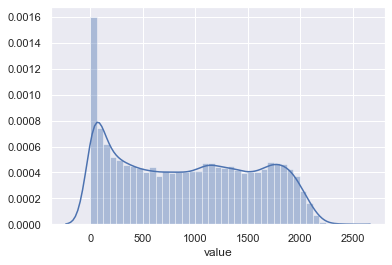

System 103941


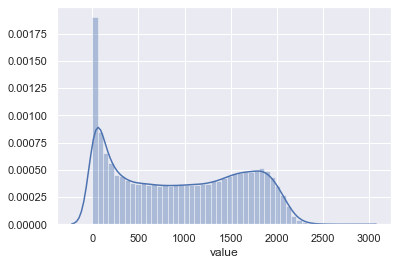

System 238320


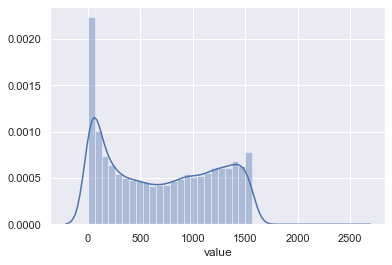

System 569932


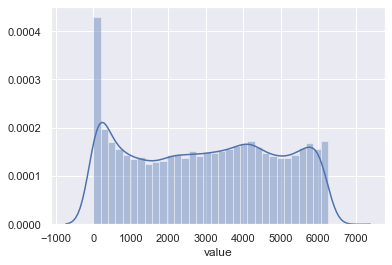

System 717193


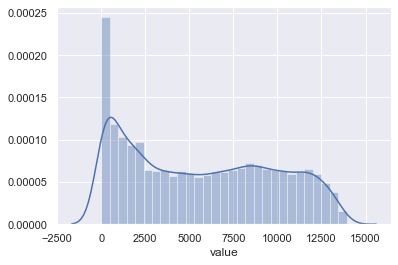

System 641826


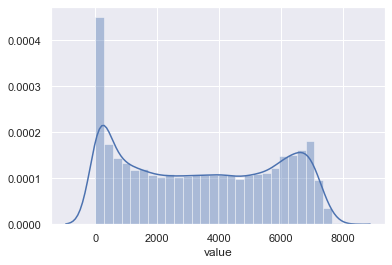

System 627759


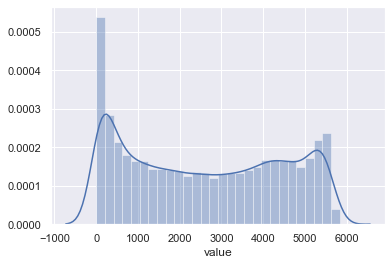

System 1232644


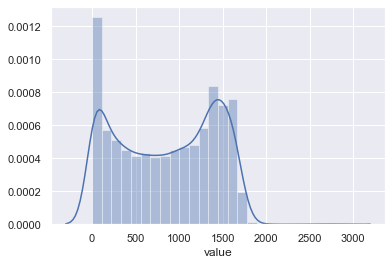

System 466851


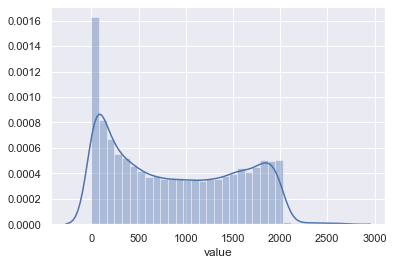

System 477834


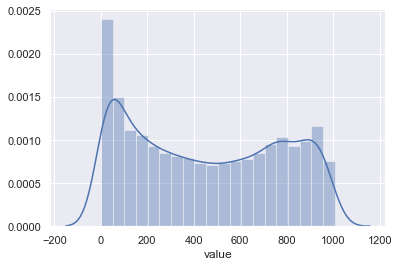

System 896164


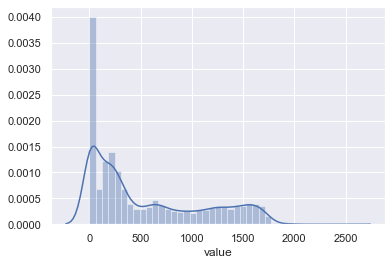

In [8]:
for key, df in data_frames.items():
    print(f'System {key}')
    filtered_df = df[df['value'] > 0]
#     print("Before standardization")
#     print(filtered_df.describe()) 
#     print(filtered_df.head())    

    sns.distplot(filtered_df['value'])
    plt.show()

These graphs do not show at all what I expected. I was thinking that the data would be normally distributed given that I filtered out all of the zero values in the production. What these graphs reveal is that for every system there is a large number of 15 minute increments that produce little to no energy. The rest of the values appear to be uniformly distributed, while some systems show a slight increase towards the higher end of the production values. 

I think it's safe to assume that the large number of low production values correspond to morning and evening times (as was show in the previous plots), so to use this data for a real model it may be worth it to get rid of the data that is low. I'm not sure how the best way to do this is, given that the distribution of the production seems a little bit off. Arbitrarily picking start and end times given information about sunrise and sunset may be a valid option, but I don't how robust that solution would be. What I would like to be able to do is to ignore values that fall outside x number of std deviations, but I don't know how useful that would be here. 

# Part 8: Try an easy solution
*What is the simplest test for your question?*

The original problem that I was trying to solve was to analyze and compare the variation in the data between different systems. Given the weird nature of the distributions shown above, I'm not sure if this type of analysis is meaningful or not. However, it's still worth experimenting with just to see what the values are. 

To do this I'm going to need some way to standardize the data between the different systems. The following function does this, essentially computing the z score for each value and using that as it's value. The Mean and Std Deviation of every system should be 0 and 1 respectively after this transformation. The following function does this. 

In [9]:
def standardize(df, label):
    """
    standardizes a series with name ``label'' within the pd.DataFrame
    ``df''.
    """
    df = df.copy(deep=True)
    series = df.loc[:, label]
    avg = series.mean()
    stdv = series.std()
    series_standardized = (series - avg)/ stdv
    return pd.DataFrame(series_standardized)

Because the mean and std deviation for every system is the same, I am interested in looking at the way the percentiles evaluate for each system. I'll print out each value, and then plot them all on a graph for an easier visual comparison. 


System 505347
              value
count  3.893000e+04
mean  -3.838822e-15
std    1.000000e+00
min   -1.413293e+00
12%   -1.314966e+00
25%   -9.850043e-01
33%   -6.838357e-01
50%   -1.202718e-02
63%    4.926702e-01
75%    9.415427e-01
87%    1.295027e+00
max    1.616743e+00

System 256177
              value
count  5.490400e+04
mean  -1.449008e-16
std    1.000000e+00
min   -1.252761e+00
12%   -1.161755e+00
25%   -9.600529e-01
33%   -7.495801e-01
50%   -1.669469e-01
63%    3.896676e-01
75%    8.250164e-01
87%    1.205075e+00
max    2.462801e+00

System 787197
              value
count  2.542000e+04
mean   1.411390e-15
std    1.000000e+00
min   -1.474295e+00
12%   -1.324804e+00
25%   -9.747980e-01
33%   -6.863160e-01
50%   -7.919405e-02
63%    5.809838e-01
75%    1.078691e+00
87%    1.284577e+00
max    2.665803e+00

System 349060
              value
count  5.298100e+04
mean  -6.337414e-16
std    1.000000e+00
min   -1.436003e+00
12%   -1.301428e+00
25%   -9.472035e-01
33%   -6.734140e-01


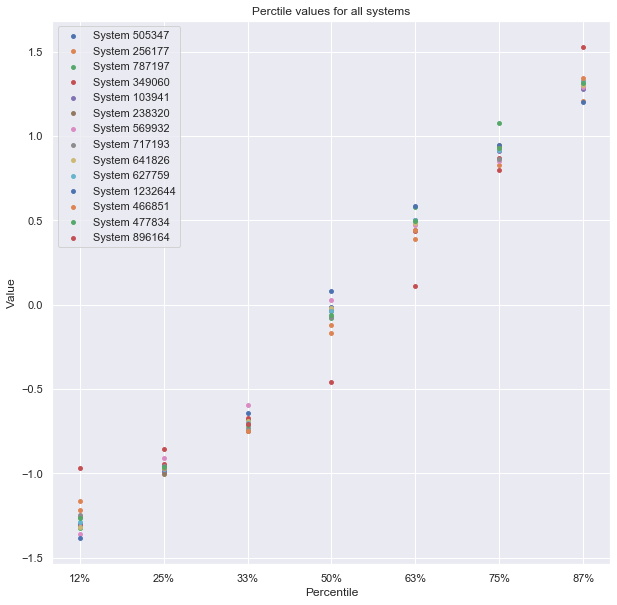

In [13]:
plt.figure(figsize=(10,10))
# test_frames = {'505347': data_frames['505347']}
# for key, df in test_frames.items():
for key, df in data_frames.items():
    # we want to standardize the data first
    print()
    print(f'System {key}')
    filtered_df = df[df['value'] > 0]
    filtered_df = standardize(filtered_df, 'value')
#     perc = [0.2, 0.4, 0.6, 0.8]
    perc = [0.12, 0.25, 0.33, 0.5, 0.63, 0.75, 0.87]
    desc = filtered_df.describe(percentiles=perc)
#     perc_values = desc.loc[['20%', '40%','60%','80%']]
    print(desc)
    perc_values = desc.loc[['12%','25%', '33%','50%', '63%','75%', '87%']]
    plt.scatter(perc_values.index, perc_values['value'], s=15, label=f'System {key}')
    plt.xlabel("Percentile")
    plt.ylabel("Value")

plt.title(f'Perctile values for all systems')    
plt.legend()
plt.show()

This graph shows that all of the values cluster around one value for the percentile calculation when the data is standardized, which is what I would expect. However, I'm not so sure that this is indicative of anything, because when we calculated the mean and std deviation of the data point, we are making an assumption that the random variable comes from the the normal distribution. The previous histograms of the data indicated that we were not drawing from a normal distribution. I'm guessing that because we are making the assumption that the data comes from the normal distribution, that the graph of the percentiles would be that way no matter what data we were pulling from. However, there is an outlier for each percentile value (the red dot which corresponds with System 896164), so that tells me that maybe it's not the case that we expect the clustering around the values that we got. All in all, I feel as if I'm a little bit more confused about the data set that I was to begin with, which I'm going to guess is a good thing. One thing that has become clear to me in this experiment is that I don't have a solid understanding of stastistics, and maybe am not measuring the right thing. I would consider this a failed experiment, probably because I was asking the wrong question. However, it was still enlightening to visualize the data to get a sense of what I am dealing with. 